In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from rtbm import RTBM, minimizer
from rtbm.costfunctions import logarithmic

import warnings
warnings.filterwarnings('ignore')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


# Example 1

## Generate data

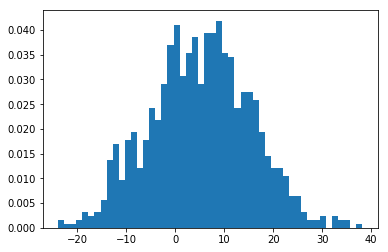

In [2]:
# simple gaussian
n = 1000
data = (np.random.normal(5,10,n)).reshape(1,n)
plt.hist(data.T, bins=50, normed=True);

## Training

In [3]:
a = RTBM(1,1)

In [4]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [5]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-4)

(4_w,9)-aCMA-ES (mu_w=2.8,w_1=49%) in dimension 6 (seed=768242, Fri Nov  3 18:57:55 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      9 6.596145993006357e+03 1.0e+00 1.04e-01  1e-01  1e-01 0:00.2
    2     18 6.166335621699333e+03 1.3e+00 9.63e-02  9e-02  1e-01 0:00.3
    3     27 5.036317974570613e+03 1.4e+00 9.81e-02  9e-02  1e-01 0:00.5
   19    171 3.754449062272391e+03 3.2e+00 3.53e-02  2e-02  4e-02 0:03.6
   40    360 3.748502984861317e+03 1.5e+01 9.25e-03  3e-03  1e-02 0:07.6
   67    603 3.748474173669706e+03 8.0e+01 1.28e-03  2e-04  2e-03 0:12.8
   99    891 3.748473931958458e+03 2.9e+02 1.98e-04  1e-05  3e-04 0:18.8
  100    900 3.748473932035820e+03 3.1e+02 1.72e-04  9e-06  3e-04 0:19.0
  103    927 3.748473931753460e+03 3.7e+02 1.45e-04  6e-06  2e-04 0:19.6
CMAEvolutionStrategyResult(xbest=array([ 8.66534407e-02, -1.27500573e-01, -9.97497945e-01,  3.42967208e-01,
        4.14811893e-07, -1.40354330e-01]), fbest=(3748.4739315866527-0j),

## Testing output

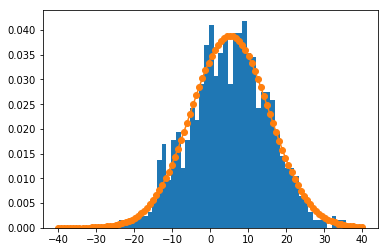

In [6]:
test_data = (np.linspace(-40,40, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True)
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')

# Example 2

## Generate data

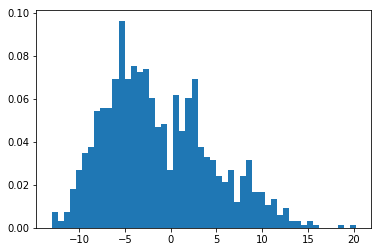

In [7]:
def gaussian_mixture(n):
    v = np.zeros(n)
    u = np.random.random_sample(n)
    for i in range(n):
        if u[i] < 0.6:
            v[i] = np.random.normal(-5, 3)
        elif u[i] < 0.7:
            v[i] = np.random.normal(2, 1)
        else:
            v[i] = np.random.normal(5, 5)
    return v

n = 1000
data = (gaussian_mixture(n)).reshape(1,n)
plt.hist(data.T, normed=True, bins=50);

## Training

In [8]:
a = RTBM(1,2)

In [ ]:
minim = minimizer.CMA(True)

CMA on 16 cpu(s) enabled


In [ ]:
solution = minim.train(logarithmic(), a, data, tolfun=1e-5)

(5_w,11)-aCMA-ES (mu_w=3.4,w_1=42%) in dimension 12 (seed=797156, Fri Nov  3 18:58:15 2017)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     11 1.529953234292351e+04 1.0e+00 9.43e-02  9e-02  1e-01 0:00.3
    2     22 1.161710145135589e+04 1.1e+00 9.78e-02  9e-02  1e-01 0:00.7
    3     33 7.928728238419330e+03 1.2e+00 1.05e-01  1e-01  1e-01 0:00.9
   12    132 3.439527648985584e+03 1.7e+00 1.68e-01  2e-01  2e-01 0:04.1
   13    143 3.401131392981070e+03 1.8e+00 1.73e-01  2e-01  2e-01 0:28.3


## Testing output

In [ ]:
test_data = (np.linspace(-50,50, 100)).reshape(1, 100)
plt.hist(data.T, bins=50, normed=True);
plt.plot(test_data.flatten(), a(test_data).flatten(), 'o-')